# Importation des principales librairies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Importation des fichiers Excel

In [4]:
warnings.simplefilter(action='ignore', category=UserWarning)
erp = pd.read_excel('erp.xlsx')
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [5]:
erp.shape

(825, 5)

In [6]:
liaison = pd.read_excel('liaison.xlsx')
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [7]:
liaison.shape

(825, 2)

In [8]:
web = pd.read_excel('web.xlsx')
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [9]:
web.shape

(1513, 28)

On renomme la colonne 'id_web' sur la table Liaison, car Sylvie s'est trompée et au fait elle correspond à la colonne 'SKU' de la table Web :

In [10]:
liaison.rename(columns = {'id_web' : 'sku'}, inplace = True)
liaison.head()

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


# Nettoyage du jeu de données

### 1. Erreurs de type

In [11]:
liaison.dtypes

product_id     int64
sku           object
dtype: object

In [12]:
web.dtypes

sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


In [13]:
erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

On doit changer le type des colonnes 'sku' par numérique.
On trouvera trois données qui sont du type objet sur ces colonnes, donc on ira changer ces réferences pour les considérer comme numérique :

- Référence "bon-cadeau-25-euros" = 37 (référence la plus petite -1)
- Référence "13127-1" = 131271
- Référence "14680-1" = 146801

In [14]:
web.loc[web['sku'] == 'bon-cadeau-25-euros', 'sku'] = 37
liaison.loc[liaison['sku'] == 'bon-cadeau-25-euros', 'sku'] = 37

web.loc[web['sku'] == '13127-1', 'sku'] = 131271
liaison.loc[liaison['sku'] == '13127-1', 'sku'] = 131271

web.loc[web['sku'] == '14680-1', 'sku'] = 146801
liaison.loc[liaison['sku'] == '14680-1', 'sku'] = 146801

Finalement, on fait la conversion des colonnes 'sku' des tables Web et Liaison :

In [15]:
web['sku'] = pd.to_numeric(web['sku'])
liaison['sku'] = pd.to_numeric(liaison['sku'])

### 2. Valeurs manquantes

In [16]:
erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [17]:
web.isnull().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

On voit que aucune information ne manque sur la table ERP, alors que nous avons beacoup d'informations manquantes sur la table Web. Regardons plus en détails les données pour lesquelles 'SKU' est manquant :

In [18]:
sku_null = web.loc[web['sku'].isnull(), :]
sku_null.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Il semble que nous n'avons que des lignes vides où 'sku' est manquant. Regardons si c'est bien le cas :

In [19]:
sku_n1 = sku_null.replace(0, np.nan).copy()
sku_n1.isnull().sum()

sku                      85
virtual                  85
downloadable             85
rating_count             85
average_rating           85
total_sales              85
tax_status               83
tax_class                85
post_author              83
post_date                83
post_date_gmt            83
post_content             85
post_title               83
post_excerpt             83
post_status              83
comment_status           83
ping_status              83
post_password            85
post_name                83
post_modified            83
post_modified_gmt        83
post_content_filtered    85
post_parent              85
guid                     83
menu_order               85
post_type                83
post_mime_type           85
comment_count            85
dtype: int64

Nous avons au fait deux lignes avec le titre du produit, le 'tax_status', 'post_author','post_date', 'post_modified', 'post_modified_gmt', 'guid' et 'post_type' qui n'ont pas de référence produit :

In [20]:
sku_n1.loc[~sku_n1['post_title'].isnull(),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,NaN,NaN,NaN,NaN,NaN,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,NaN,https://www.bottle-neck.fr/?post_type=product&...,NaN,product,NaN,NaN
471,NaN,NaN,NaN,NaN,NaN,NaN,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,NaN,https://www.bottle-neck.fr/?post_type=product&...,NaN,product,NaN,NaN


On essayera de trouver les codes SKU de ces deux produits à travers ces noms :

In [21]:
web.loc[web['post_name'] == 'pierre-jean-villa-cote-rotie-fongeant-2017', :]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [22]:
web.loc[web['post_name'] == 'pierre-jean-villa-condrieu-suspendu-2018', :]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Comme il n'y a pas d'autres lignes avec les mêmes noms produits, nous ne pouvons pas trouver leurs références. On ne peut pas savoir si ces produits ont de correspondance dans la table ERP non plus. 
Comme aucune quantitité de ces deux types de vin n'a été vendue, on va supprimer ces deux lignes, et toutes les autres lignes qui sont vides dans la table Web. 

In [23]:
web = web.drop(web.loc[web['sku'].isnull()].index)
print(web.isnull().sum())
print(web.shape)

sku                         0
virtual                     0
downloadable                0
rating_count                0
average_rating              0
total_sales                 0
tax_status                714
tax_class                1428
post_author                 0
post_date                   0
post_date_gmt               0
post_content             1428
post_title                  0
post_excerpt              714
post_status                 0
comment_status              0
ping_status                 0
post_password            1428
post_name                   0
post_modified               0
post_modified_gmt           0
post_content_filtered    1428
post_parent                 0
guid                        0
menu_order                  0
post_type                   0
post_mime_type            714
comment_count               0
dtype: int64
(1428, 28)


Toutes les cellules des colonnes 'tax_class', 'post_content', 'post_password' et 'post_content_filtered' sont vides. Alors, on les supprime :

In [24]:
web.drop(['tax_class', 'post_content', 'post_password', 'post_content_filtered'], axis=1, inplace=True)

In [25]:
web.isnull().sum()

sku                    0
virtual                0
downloadable           0
rating_count           0
average_rating         0
total_sales            0
tax_status           714
post_author            0
post_date              0
post_date_gmt          0
post_title             0
post_excerpt         714
post_status            0
comment_status         0
ping_status            0
post_name              0
post_modified          0
post_modified_gmt      0
post_parent            0
guid                   0
menu_order             0
post_type              0
post_mime_type       714
comment_count          0
dtype: int64

Pour la table Liaison :

In [26]:
liaison.isnull().sum()

product_id     0
sku           91
dtype: int64

Sylvie, l'ancienne stagiaire, a précisé en mail : "la liste des product_id est exhaustive, mais pour les références côté Web, j’en suis moins sûre... J’ai peiné à rapprocher certaines références."
Pour cette raison, il y a 91 références SKU qui ne trouvent pas de correspondence 'product_id'.

### 3. Doublons

Regardons à présent si certains produits sont apparus en doublons.  
D'abord, on fait le test d'unicité de la clé primaire de chaque table : 

In [27]:
web["sku"].is_unique,erp["product_id"].is_unique

(False, True)

On peut voir que chaque CP de la table ERP est unique, ce qui n'est pas vrai pour la table Web.  
Ainsi, la table ERP n'a pas de bouteilles qui sont apparus en doublons :

In [28]:
erp.loc[erp['product_id'].duplicated(keep=False),:]

,product_id,onsale_web,price,stock_quantity,stock_status


Regardons les produits en doublons sur la table Web :

In [29]:
web.loc[web['sku'].duplicated(keep=False),:].sort_values('sku')

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,37.0,0,0,0,0.0,10.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1209,37.0,0,0,0,0.0,10.0,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,...,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
339,38.0,0,0,0,0.0,38.0,taxable,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,...,closed,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1123,38.0,0,0,0,0.0,38.0,NaN,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,...,closed,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
269,41.0,0,0,0,0.0,0.0,taxable,2.0,2018-04-14 12:01:43,2018-04-14 10:01:43,...,closed,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,19821.0,0,0,0,0.0,0.0,taxable,2.0,2018-11-26 10:56:30,2018-11-26 09:56:30,...,closed,tempier-bandol-tourtine-2017,2019-11-02 12:59:24,2019-11-02 11:59:24,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1301,19822.0,0,0,0,0.0,0.0,NaN,2.0,2018-11-26 10:59:10,2018-11-26 09:59:10,...,closed,tempier-bandol-cabassaou-2017,2020-01-04 13:57:04,2020-01-04 12:57:04,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
527,19822.0,0,0,0,0.0,0.0,taxable,2.0,2018-11-26 10:59:10,2018-11-26 09:59:10,...,closed,tempier-bandol-cabassaou-2017,2020-01-04 13:57:04,2020-01-04 12:57:04,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,131271.0,0,0,0,0.0,0.0,taxable,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,...,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


On voit qu'il y a, pour chaque produit unique (même clé primaire), deux lignes : 

- une ligne où 'tax_statut' = 'taxable', 'post_type' = 'product' et 'post_mime_type' est manquant;
- une ligne où 'tax_statut' est manquant, 'post_type' = 'attachment' et 'post_mime_type' = 'image/jpeg'.

Pour nos analyses, on ne va utiliser que les informations référentes aux produits. On n'aura pas besoin des lignes concernantes aux images attachées de chaque produit, donc on ira les supprimer :

In [30]:
web = web.loc[web['post_type'] == 'product', :]

Et on n'a pas besoin de la colonne 'post_mime_type', qui est nulle, donc on la supprime aussi :

In [31]:
web.drop(['post_mime_type'], axis=1, inplace=True)

De cette manière, nous avons une table finale qui respecte la contrainte d'unicité de la clé primaire SKU.

### 4. Detection d'outliers

In [32]:
erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.415636,26.496970
std,902.644635,0.337506,26.795849,45.892422
min,3847.000000,0.000000,5.200000,0.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


In [33]:
web.describe()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,post_author,post_parent,menu_order,comment_count
count,714.000000,714.0,714.0,714.0,714.0,714.000000,714.000000,714.0,714.0,714.0
mean,14622.978992,0.0,0.0,0.0,0.0,4.012605,1.998599,0.0,0.0,0.0
std,5332.437852,0.0,0.0,0.0,0.0,8.518183,0.037424,0.0,0.0,0.0
min,37.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0
25%,14367.250000,0.0,0.0,0.0,0.0,0.000000,2.000000,0.0,0.0,0.0
50%,15380.000000,0.0,0.0,0.0,0.0,1.000000,2.000000,0.0,0.0,0.0
75%,15880.750000,0.0,0.0,0.0,0.0,4.000000,2.000000,0.0,0.0,0.0
max,131271.000000,0.0,0.0,0.0,0.0,96.000000,2.000000,0.0,0.0,0.0


Nous allons étudier la distribution de la variable 'prix' lors de la cinquième étape pour pouvoir détecter des outliers.

# 1. Rapprochement des exports

Jointure interne :

In [34]:
erp_liaison = pd.merge(erp, liaison, on = 'product_id')
erp_liaison.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,1,24.2,0,outofstock,15298.0
1,3849,1,34.3,0,outofstock,15296.0
2,3850,1,20.8,0,outofstock,15300.0
3,4032,1,14.1,0,outofstock,19814.0
4,4039,1,46.0,0,outofstock,19815.0


Jointure à gauche :

In [35]:
web_erp = pd.merge(erp_liaison, web, on = 'sku', how = 'left')
web_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
0,3847,1,24.2,0,outofstock,15298.0,0.0,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
1,3849,1,34.3,0,outofstock,15296.0,0.0,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
2,3850,1,20.8,0,outofstock,15300.0,0.0,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
3,4032,1,14.1,0,outofstock,19814.0,0.0,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
4,4039,1,46.0,0,outofstock,19815.0,0.0,0.0,0.0,0.0,...,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0


In [36]:
web_erp.isnull().sum()

product_id             0
onsale_web             0
price                  0
stock_quantity         0
stock_status           0
sku                   91
virtual              111
downloadable         111
rating_count         111
average_rating       111
total_sales          111
tax_status           111
post_author          111
post_date            111
post_date_gmt        111
post_title           111
post_excerpt         111
post_status          111
comment_status       111
ping_status          111
post_name            111
post_modified        111
post_modified_gmt    111
post_parent          111
guid                 111
menu_order           111
post_type            111
comment_count        111
dtype: int64

In [37]:
web_erp.shape

(825, 28)

# 2. Chiffre d’affaires par produit

In [38]:
web_erp['CA par produit'] = web_erp['price']*web_erp['total_sales']
CA = web_erp[['product_id', 'sku', 'onsale_web','price','stock_quantity','CA par produit']]
CA.sort_values('CA par produit', ascending=False).head()

,product_id,sku,onsale_web,price,stock_quantity,CA par produit
203,4334,7818.0,1,49.0,0,4704.0
74,4144,1662.0,1,49.0,11,4263.0
227,4402,3510.0,1,176.0,8,2288.0
73,4142,11641.0,1,53.0,8,1590.0
72,4141,304.0,1,39.0,1,1560.0


# 3. Chiffre d’affaires total réalisé en ligne

Si la valeur dans la colonne 'onsale_web' est égal à 1 (boolean), c'est-à dire que la vente a été réalisée en ligne. Donc :

In [39]:
ca_total = web_erp.loc[web_erp['onsale_web']==1,'CA par produit'].sum()
ca_total

70568.6

### Le CA total réalisé en ligne est de 70 568 €

# 4. Analyse du prix des produits

### 1. Représentation de la distribution empirique de la variable prix

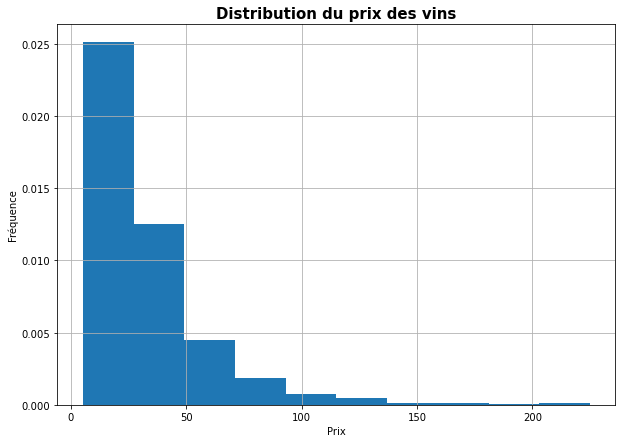

In [40]:
# Histogramme
plt.figure(figsize=(10,7))
web_erp['price'].hist(density=True)
plt.title("Distribution du prix des vins", fontsize=15, fontweight='bold')
plt.xlabel("Prix")
plt.ylabel("Fréquence")
plt.show()

### 2. Présentation de la variable prix sous forme de tableau

In [41]:
cut = pd.cut(web_erp.price, bins=np.linspace(5, 225, 11)) # création des classes de prix (9 catégories)

cut.head()

0     (5.0, 27.0]
1    (27.0, 49.0]
2     (5.0, 27.0]
3     (5.0, 27.0]
4    (27.0, 49.0]
Name: price, dtype: category
Categories (10, interval[float64, right]): [(5.0, 27.0] < (27.0, 49.0] < (49.0, 71.0] < (71.0, 93.0] ... (137.0, 159.0] < (159.0, 181.0] < (181.0, 203.0] < (203.0, 225.0]]

In [42]:
prix_categ = pd.DataFrame(cut.values, columns = ['Prix']) # classes de prix sous forme de tableau
prix_categ.head()

,Prix
0,"(5.0, 27.0]"
1,"(27.0, 49.0]"
2,"(5.0, 27.0]"
3,"(5.0, 27.0]"
4,"(27.0, 49.0]"


In [43]:
effectifs = prix_categ['Prix'].value_counts() # effectifs de chaque classe de prix
display(effectifs)

(5.0, 27.0]       455
(27.0, 49.0]      227
(49.0, 71.0]       81
(71.0, 93.0]       34
(93.0, 115.0]      13
(115.0, 137.0]      8
(137.0, 159.0]      2
(159.0, 181.0]      2
(203.0, 225.0]      2
(181.0, 203.0]      1
Name: Prix, dtype: int64

In [44]:
prix = effectifs.index # l'index de effectifs contient les modalités (classes de prix)

tab = pd.DataFrame(prix, columns = ['prix']) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(web_erp) # len(web_erp) renvoie la taille de l'échantillon

tab.sort_values('prix')

,prix,n,f
0,"(5.0, 27.0]",455,0.551515
1,"(27.0, 49.0]",227,0.275152
2,"(49.0, 71.0]",81,0.098182
3,"(71.0, 93.0]",34,0.041212
4,"(93.0, 115.0]",13,0.015758
5,"(115.0, 137.0]",8,0.009697
6,"(137.0, 159.0]",2,0.002424
7,"(159.0, 181.0]",2,0.002424
9,"(181.0, 203.0]",1,0.001212
8,"(203.0, 225.0]",2,0.002424


### 3. Mesures de tendance centrale

In [45]:
web_erp['price'].mean()

32.41563636363638

In [46]:
web_erp['price'].mode()

0    45.0
Name: price, dtype: float64

In [47]:
web_erp['price'].median()

24.4

La moyenne du prix des vins est de 32.42 €, la mode est 45 € et la médiane est 24.4 €.

### 4. Mesures de dispersion

In [48]:
web_erp['price'].var(ddof=0)

717.147210049587

In [49]:
web_erp['price'].std(ddof=0)

26.779604366935427

La variance est de 717.14 et l'écart type est de 26.78 €.
- Moyenne - écart-type : 32.42 - 26.78 = 5.64
- Moyenne + écart-type : 32.42 + 26.78 = 59.20
Ainsi, la plupart des vins se situent entre les prix de 5.64 € et 59.20 €.

- Graphique boîte à moustaches :

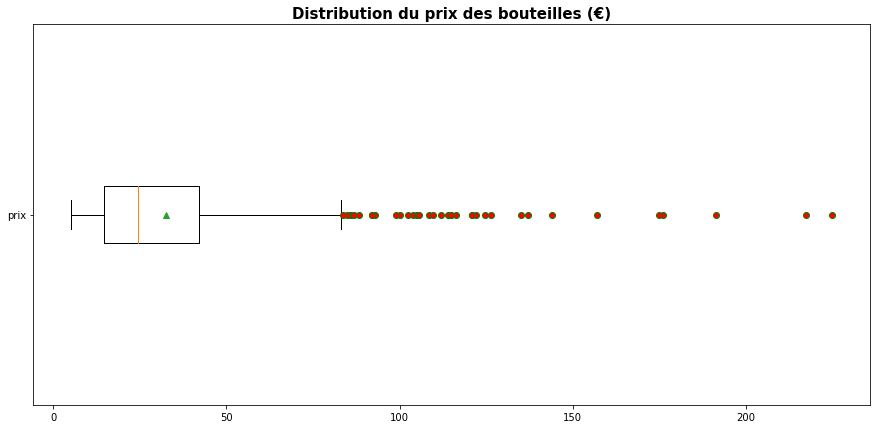

In [76]:
plt.figure(figsize=(15,7))
flierprops = dict(marker='o', markerfacecolor='r', markeredgecolor='g', markersize=6)
plt.boxplot(web_erp['price'], vert=False, labels=['prix'], showmeans=True, flierprops=flierprops)
plt.title("Distribution du prix des bouteilles (€)", size=15, fontweight='bold')
plt.show()

On voit ici le rectangle qui est délimité par Q1 (valeur au-dessous de laquelle se trouvent 25 % des valeurs) et Q3 (valeur au-dessous de laquelle se trouvent 75 % des valeurs), avec la ligne orange à l'intérieur qui répresente la médiane et le triangle vert qui répresente la moyenne. 

Les "moustaches" vont de la valeur minimale jusqu'à la valeur maximale qui ne dépasse pas 1.5*(Q3-Q1). <br /> 
Toutes les autres valeurs au-dessus, donc, sont considerées comme des outliers (possibles erreurs de frappe sur fichier).

In [51]:
q3, q1 = np.percentile(web_erp['price'], [75 ,25])
print("Q1 = ", q1, "et Q3 =", q3)

Q1 =  14.6 et Q3 = 42.0


In [52]:
print ("Ecart interquartille (Q3 - Q1) =", q3-q1)

Ecart interquartille (Q3 - Q1) = 27.4


Pour que les valeurs ne soient pas considérées comme des outliers, elles ne doivent pas dépasser :

In [53]:
seuil = q3 + 1.5*(q3-q1)
print(seuil, "€")

83.1 €


Voyons combien de bouteilles ont des prix au-dessus du seuil de 83.1 € :

In [54]:
x = web_erp.loc[web_erp['price']>seuil,'price'].count()
print("Entre", len(web_erp), "bouteilles,", x, "ont été enregistrée comme coûtant plus de", seuil, "€, ce qui répresente", round(x*100/len(web_erp),2), "% du total de bouteilles sur le fichier.")

Entre 825 bouteilles, 37 ont été enregistrée comme coûtant plus de 83.1 €, ce qui répresente 4.48 % du total de bouteilles sur le fichier.


Ainsi, nous avons 37 possibles erreurs de frappe de prix sur le fichier.  
Liste des valeurs aberrantes :

In [55]:
outliers = web_erp.loc[web_erp['price']>seuil,:].sort_values('price',ascending=False)
outliers[['product_id','sku','price']]

,product_id,sku,price
208,4352,15940.0,225.0
460,5001,14581.0,217.5
635,5892,14983.0,191.3
227,4402,3510.0,176.0
598,5767,15185.0,175.0
230,4406,7819.0,157.0
242,4594,NaN,144.0
411,4904,14220.0,137.0
697,6126,14923.0,135.0
210,4355,12589.0,126.5


Et la représentation graphique en nuage de points des valeus considerées comme normales et comme aberrantes, selon l'analyse interquartille :

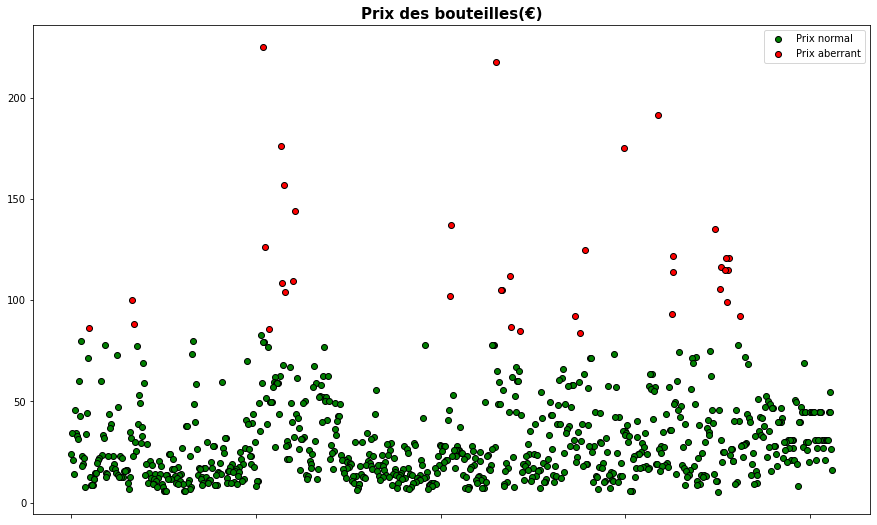

In [78]:
normale = web_erp.loc[web_erp['price']<seuil,:].sort_values('price',ascending=False)
normale_index = normale.index
outliers_index = outliers.index

plt.figure(figsize=(15,9))
plt.scatter(normale.index, normale['price'], color='green', edgecolor='black', label='Prix normal')
plt.scatter(outliers.index, outliers['price'], color='red', edgecolor='black', label='Prix aberrant')
ax = plt.gca()
ax.xaxis.set_tick_params(labelbottom=False)
plt.title("Prix des bouteilles(€)", size=15, fontweight='bold')
plt.legend()
plt.show()

En termes de chiffre d'affaires :

In [57]:
ca_aberrant = CA.loc[CA['price']>seuil,'CA par produit'].sum()
print("Le CA des bouteilles dont le prix est consideré comme aberrant est de", ca_aberrant, "€, soit", round(ca_aberrant*100/CA['CA par produit'].sum(),2), "% du CA total.")

Le CA des bouteilles dont le prix est consideré comme aberrant est de 6970.0 €, soit 9.88 % du CA total.


### 4. Mesures de forme

Pour finir et avoir plus d'informations sur la distribution des prix, on calcule Skewness et Kurtosis :

In [58]:
web_erp['price'].skew()

2.6227973685638717

In [59]:
web_erp['price'].kurtosis()

10.615358266001198

Comme Skewness est positif, la distribution de la variable prix est plutôt étalée à droite (asymétrie positive). 
Le Kurtosis positif nous indique que la distribution est moins aplatie que la distribution gaussienne (observations plus concentrées).